1) <span style="color:red"> Antes que nada, lee cuidadosamente estas instrucciones y las que aparecen en la hoja con la contraseña. </span>

2) Cambia el nombre de este archivo sustituyendo "nombre.apellido" por los tuyos, tal como aparecen en tu dirección de correo electrónico de la UAM.

3) Este archivo debe quedar en la carpeta "ENTREGA..." que está en el escritorio de tu cuenta de examen. Lo mejor es que esté en esa carpeta desde el comienzo del examen.

4) El examen resuelto debe quedar en este único archivo. No se puede usar un archivo para cada pregunta.

5) Recuerda que hay que deshabilitar el salvapantallas al comenzar el examen, tal como está indicado en la hoja con la contraseña. 




CALIFICACIÓN:


COMENTARIOS:

1)

## Ejercicio 1

Consideramos el siguiente 'juego': inicialmente hay $n$ jugadores  y en cada fase del juego cada jugador vivo elige **al azar** otro jugador vivo, distinto de sí mismo,  y lo mata.  El juego se repite hasta que queda un único jugador, *el elegido del destino*, o bien ninguno. En principio, es perfectamente posible que el juego se juegue una única vez.

1) Estima, con dos cifras decimales 'correctas',  la probabilidad de que, partiendo de  $n=100$ jugadores, haya un superviviente. Como se indicó en clase, entendemos que que son cifras decimales 'correctas' las que no cambian cuando se incrementa suficientemente el número $N$ de 'casos posibles'.

2) ¿Qué probabilidad tengo, si decido jugar con otros $99$ jugadores,  de ser yo el *elegido del destino*? Modifica el programa del apartado anterior para estimar la probabilidad y explica el resultado obtenido.

3) Ahora queremos estudiar la duración del juego. Para eso debemos  calcular *promedios* de la duración. Define una función *promedio(n,N)* que calcule el promedio y la desviación estándar de la duración con $n$ jugadores iniciales y $N$ repeticiones del juego. Evalúa *promedio(100,10^5)* y comenta los resultados obtenidos.

4) Finalmente, estudia la variación de los promedios al variar $n$ entre $10$ y $200$ saltando de $10$ en $10$. Realiza un gráfico de los resultados y analiza la dependencia funcional (el promedio como función de $n$). En este cuarto apartado probablemente tendrás que **elegir con más cuidado un $N$** (el número de repeticiones del juego utilizadas para calcular cada promedio) **adecuado**  dadas las capacidades bastante limitadas de la máquina. 

In [1]:
def matar(vivos):
    if len(vivos) == 1:
        return vivos
    long = len(vivos)
    muertos = []
    for item in vivos:
        L2 = copy(vivos)
        L2.remove(item)
        n = randint(0,long-2)
        muertos.append(L2[n])
    sobreviven = list(set(vivos)-set(muertos))
    return sobreviven

print matar(srange(100))


[4, 5, 6, 8, 9, 11, 13, 15, 17, 24, 32, 34, 38, 41, 42, 44, 45, 46, 49, 51, 53, 55, 60, 61, 62, 63, 65, 66, 68, 75, 78, 84, 87, 90, 93, 97]


In [2]:
def probabilidad(n,N):
    favorables = 0
    for muda in xsrange(N):
        vivos = srange(n)
        sobreviven = copy(vivos)
        while len(sobreviven) > 1:
            sobreviven = matar(sobreviven)
        if len(sobreviven) == 1:
            favorables += 1
    return (favorables/N).n()

%time L = [probabilidad(100,10^k) for k in srange(3,6)]
print L

CPU times: user 1min 54s, sys: 748 ms, total: 1min 54s
Wall time: 1min 54s
[0.544000000000000, 0.513200000000000, 0.518960000000000]


Debemos considerar que las dos primeras cifras decimales, que ya obtenemos con $10^4$ iteraciones son correctas porque se mantienen al pasar a $10^5$ iteraciones.

In [3]:
def probabilidad2(n,N):
    favorables = 0
    for muda in xsrange(N):
        vivos = srange(n)
        sobreviven = copy(vivos)
        while len(sobreviven) > 1:
            sobreviven = matar(sobreviven)
        if len(sobreviven) == 1 and sobreviven == [0]:
            favorables += 1
    return (favorables/N).n()

%time L1 = [probabilidad2(100,10^k) for k in srange(3,6)]
print L1

CPU times: user 1min 52s, sys: 532 ms, total: 1min 52s
Wall time: 1min 52s
[0.00500000000000000, 0.00540000000000000, 0.00471000000000000]


La probabilidad obtenida, del orden de $0.005$ es la centésima parte de la obtenida en el apartado anterior. Es lo esperable porque no hay nada en el problema que me distinga de los otros $99$ jugadores, de forma que la probabilidad de que sobreviva alguno se debería  repartir equitativamente entre los $100$ jugadores. 

In [4]:
def promedio(n,N):
    L = []
    for muda in xsrange(N):
        jugadas = 0
        vivos = srange(n)
        sobreviven = copy(vivos)
        while len(sobreviven) > 1:
            jugadas += 1
            sobreviven = matar(sobreviven)
        L.append(jugadas)
    return (sum(L)/N).n(),sage.stats.basic_stats.std(L).n()

%time P = promedio(100,10^5)
print P

CPU times: user 1min 44s, sys: 452 ms, total: 1min 44s
Wall time: 1min 44s
(4.43459000000000, 0.514183017749281)


La desviación estándar es bastante baja, y debemos esperar que el número de jugadas sea casi siempre menor a $6$.

In [5]:
def promedios(n,N):
    L = []
    for int in srange(10,n,10):
        L.append((int,promedio(int,N)[0]))
    return L

In [6]:
%time L2 = promedios(200,10**3)

CPU times: user 20.1 s, sys: 172 ms, total: 20.2 s
Wall time: 20.1 s


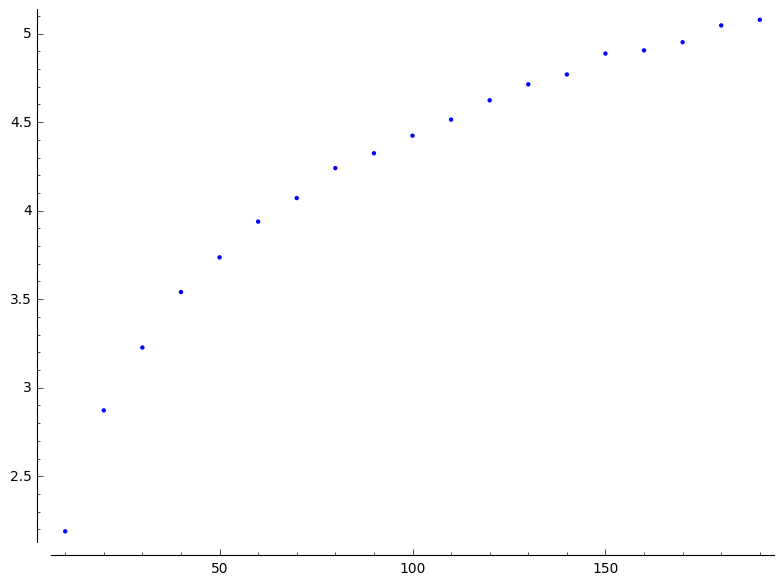

In [7]:
points(L2)

In [8]:
%time L3 = promedios(500,10**3)

CPU times: user 2min 49s, sys: 1.32 s, total: 2min 50s
Wall time: 2min 49s


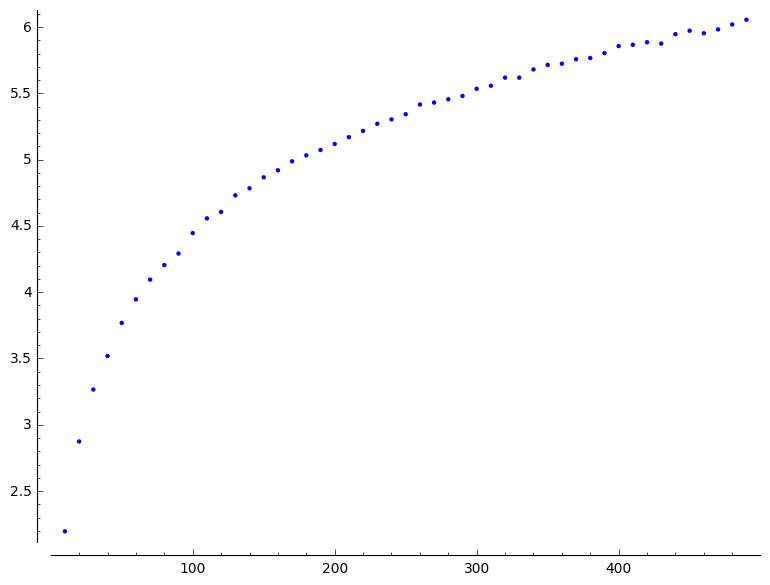

In [9]:
points(L3)

In [10]:
var('A B'); model(x)=A*x^(B)

In [11]:
diccionario = find_fit(L3,model,solution_dict=True); print diccionario

{A: 1.6130102902552235, B: 0.21582369215357156}


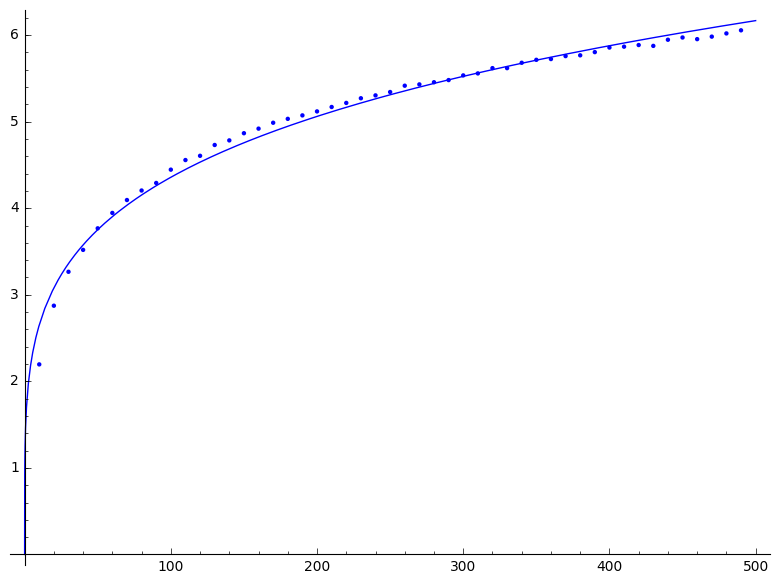

In [12]:
points(L3)+plot(diccionario[A]*x^(diccionario[B]),x,0,500)

In [13]:
var('C D'); model2(x)=C+D*log(x)

In [14]:
diccionario2 = find_fit(L3,model2,solution_dict=True); print diccionario2

{C: -0.12150578157342573, D: 0.992751805764356}


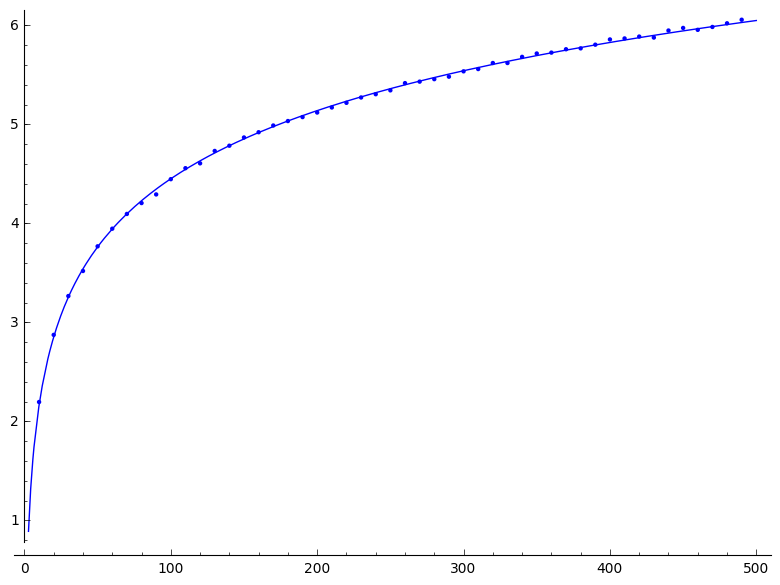

In [15]:
points(L3)+plot(diccionario2[C]+diccionario2[D]*log(x),x,0,500)

Aunque el primer modelo no es muy malo, parece claro que es mejor el segundo.

## Ejercicio 2

Hemos visto que es posible estimar el área de un disco unidad *lanzando dardos al cuadrado unidad y contando los que caen dentro del disco*. El mismo procedimiento permite, en principio,  estimar el volumen de la hiperesfera $\mathbb{B}_n$  de radio $1$ en $\mathbb{R}^n$ (i.e. el conjunto de puntos de coordenadas $(x_1,x_2,\dots,x_n)\in \mathbb{R}^n$ tales que $x_1^2+x_2^2+\dots+x_n^2\le 1$), pero los volúmenes que vamos obteniendo al incrementar $n$ son cada vez más pequeños y bastante pronto obtenemos cero como respuesta. 

Ésto se debe a que, cuando $n$ es grande, muy pocos dardos caen dentro de la hiperesfera debido a que ocupa muy poco volumen con respecto al volumen, $2^n$,  del hipercubo unidad $[-1,1]^n$. En este ejercicio vemos una manera distinta de *lanzar dardos*, que nos va a asegurar que suficientes caen dentro de la hiperesfera. Denotemos por $V(n)$ el volumen de $\mathbb{B}_n$, que es lo que  queremos calcular. 

### Descripción del método

1) El *truco básico* consiste en considerar la hiperesfera de dimensión $n$  dentro del hipercilindro $\mathbb{C}_n:=\mathbb{B}_{n-1}\times [-1,1]$, en lugar de dentro del hipercubo $[-1,1]^n$.  El volumen del hipercilindro es, gracias al teorema de Fubini del cálculo integral, igual al volumen de $\mathbb{B}_{n-1}$ multiplicado por dos. 

2) En segundo lugar  observamos que para  obtener puntos aleatorios en el hipercilindro $\mathbb{C}_n$ basta generar puntos aleatorios $(x_1,x_2,\dots,x_{n-1})\in \mathbb{B}_{n-1}$ en la hiperesfera de dimensión $n-1$ y para cada uno producir un real aleatorio $x_n$ en el intervalo $[-1,1]$. 

3) Para que esto funcione debemos encontrar una **manera eficiente** de generar puntos aleatorios en la hiperesfera $\mathbb{B}_{n-1}$,  y el método que vamos a usar se llama de  *cadena de Markov* (una especie de *paseo aleatorio generalizado*):

A) El primer punto de la cadena $\mathbf{x}_0$ es, por ejemplo,  el origen de coordenadas.
    
B) Para cada punto $\mathbf{x}_t=(x_1,x_2,\dots,x_{n-1})\in \mathbb{B}_{n-1}$  obtenemos un nuevo punto $\mathbf{x}_{t+1}$ eligiendo una coordenada al azar, supongamos que hemos obtenido $x_i$,  y un real aleatorio $\Delta$ en el  intervalo $[-\delta,\delta]$. Entonces, cambiamos $x_i$ por $x_i+\Delta$ en $\mathbf{x}$ y si todavía estamos dentro de la hiperesfera ese es el nuevo punto $\mathbf{x}_{t+1}$ en la cadena. Si al hacer el cambio nos vamos fuera de la hiperesfera dejamos $\mathbf{x}_{t+1}:=\mathbf{x}_{t}$. 

C) La cadena $\{\mathbf{x}_0,\mathbf{x}_1,\dots,\mathbf{x}_t,\dots,\mathbf{x}_N\}$ es entonces un conjunto de $N+1$ puntos, todos en la hiperesfera $\mathbb{B}_{n-1}$, y se puede demostrar que, para $N$ suficientemente grande,  están uniformemente distribuidos en la hiperesfera. 

4) Después de estos preparativos podemos ya plantear el cálculo del volumen  $V(n)$ de la hiperesfera $\mathbb{B}_n$: 

Generamos un número muy grande $N$ de puntos en la hiperesfera de dimensión $n-1$, usando el apartado 3),  y para cada uno de ellos vamos calculando un punto en el hipercilindro, como en el apartado 2). Si el punto obtenido en el hipercilindro cae dentro de la hiperesfera  de dimensión $n$, $\mathbb{B}_n$,  incrementamos un contador, al que por ejemplo hemos llamado *dentro*. 

La fracción $dentro/N$, calculada después de haber generado $N$ puntos del hipercilindro,   es aproximadamente igual al cociente de volúmenes $V(n)/(2V(n-1))$ (volumen de la hiperesfera dividido por volumen del hipercilindro). 

Entonces, podemos reducir el cálculo  de $V(n)$ al de $V(n-1)$, el de $V(n-1)$ al de $V(n-2)$, etc., hasta llegar al volumen de la hiperesfera en dimensión $1$ que es igual a dos. 



### Ejercicios

2.1) Define las funciones necesarias para implementar esta forma, *Monte Carlo con cadenas de Markov*,  de calcular $V(n).$

2.2) El volumen exacto de una hiperesfera se puede calcular mediante integrales, y se obtiene una fórmula que se indica en la celda siguiente:


In [1]:
def Vol_exacto(dim):
    return (pi**(dim/2.0)/gamma(dim/2.0+1.0)).n()

In [2]:
print Vol_exacto(1);print Vol_exacto(2); print Vol_exacto(3); print Vol_exacto(100)

2.00000000000000
3.14159265358979
4.18879020478639
2.36820210188283e-40


¿Para qué queremos estimar esos mismos volúmenes mediante Monte Carlo? Los resultados exactos sirven como control de las estimaciones, y,  en particular,  permiten ajustar de forma óptima los parámetros $N$ y $\delta$. 

El parámetro $N$ debe ser suficientemente grande para obtener una precisión aceptable, pero no tan grande que tengamos que esperar una eternidad por el resultado, y el parámetro $\delta$, un real que podemos esperar que esté entre cero y uno,  no puede ser muy pequeño,  porque entonces todos los puntos de la cadena están muy próximos entre sí y no rellenan bien la hiperesfera, ni muy grande porque entonces la cadena repite muchas veces sus valores. 

Queremos elegir los parámetros, $N$ y $\delta$,  para calcular,  mediante Monte Carlo,  el volumen de la hiperesfera de dimensión $50$  de forma que al menos sea correcta la primera cifra decimal no nula (por supuesto, cuantas más cifras correctas obtengamos mejor). Tomamos $N=10^5$ y elegimos un $\delta$ óptimo, dentro del intervalo $(0,1)$,   mediante experimentos adecuados. 



In [3]:
def Q_d(dim,N,delta):
    dentro = 0
    L = [0]*(dim-1)
    r = 0
    for j in xsrange(N):
        k = randint(0,dim-2)
        x_original = L[k]
        x_nueva = x_original+2*delta*random()-delta
        if abs(x_nueva)<1 :
            radio_nuevo = r+x_nueva**2-x_original**2
            if radio_nuevo<1:
                    L[k] = x_nueva
                    r = radio_nuevo
        t = 2*random()-1
        if r+t**2<1:
            dentro += 1
    return (dentro/N).n()

%time Q = Q_d(100,10**5,0.3)
print Q

CPU times: user 3.05 s, sys: 68 ms, total: 3.12 s
Wall time: 3.04 s
0.123980000000000


In [4]:
def vol_d(dim,N,delta):
    vol = 2 
    for m in srange(2,dim+1):
        Q = 2*Q_d(m,N,delta)
        vol *= Q
    return vol


In [5]:
%time V1 = vol_d(2,10^5,0.3)
print V1

CPU times: user 2.94 s, sys: 192 ms, total: 3.14 s
Wall time: 2.94 s
3.14820000000000


In [6]:
%time L4=[vol_d(3,10^5,0.1*k)-Vol_exacto(3) for k in srange(1,9)]
print L4

CPU times: user 44.3 s, sys: 636 ms, total: 44.9 s
Wall time: 44.3 s
[0.0493259552136092, 0.0527224536136091, -0.0329712071863915, 0.0178240720136085, 0.0200514768136086, 0.00537714401360834, -0.00351814878639178, -0.0243911831863919]


In [7]:
%time L5 = [vol_d(10,10^5,0.1*k)-Vol_exacto(10) for k in srange(1,9)]
print L5

CPU times: user 3min 19s, sys: 2.31 s, total: 3min 21s
Wall time: 3min 19s
[-0.00341646412148799, 0.0275678534926831, -0.0396129263678873, 0.0142789624172353, -0.00547400984151336, -0.0276043266061099, 0.0305001005562033, -0.0388503461844008]


Parece que el delta óptimo puede ser $\delta=0.1$ o quizá $\delta=0.5$, pero hagamos una prueba más:

In [8]:
%time L6 = [(abs(2*Q_d(50,10^5,0.1*k)-(Vol_exacto(50)/Vol_exacto(49))),k) for k in srange(1,10)]
L6.sort()
print L6

CPU times: user 30 s, sys: 412 ms, total: 30.4 s
Wall time: 30 s
[(0.00139714239327815, 8), (0.00211714239327815, 9), (0.00274285760672183, 4), (0.00310285760672185, 7), (0.00365714239327813, 3), (0.00406285760672181, 1), (0.00448285760672185, 6), (0.00521714239327814, 5), (0.00679714239327817, 2)]


In [9]:
%time L7 = [(abs(2*Q_d(50,10^6,0.1*k)-(Vol_exacto(50)/Vol_exacto(49))),k) for k in srange(1,10)]
L7.sort()
print L7

CPU times: user 4min 17s, sys: 2.75 s, total: 4min 20s
Wall time: 4min 18s
[(0.0000508576067218547, 8), (0.0000971423932781823, 3), (0.000145142393278175, 5), (0.000148857606721842, 7), (0.000364857606721836, 4), (0.000425142393278177, 6), (0.000821142393278185, 9), (0.00124114239327816, 1), (0.00152314239327817, 2)]


En los dos casos hemos obtenido  $\delta=0.8$ como óptimo, pero para asegurarnos deberíamos repetir estos cálculos más veces. Probamos a calcular el volumen usando $N=10^5$ y $\delta=0.8$.

In [12]:
%time V2 = vol_d(50,10^5,0.8)
print V2

CPU times: user 2min 13s, sys: 1.3 s, total: 2min 14s
Wall time: 2min 13s
1.73476593458007e-13


In [11]:
Vol_exacto(50)

1.73021924583611e-13